Data! Data! Data! I can’t make bricks without clay!
—Sherlock Holmes

This chapter is about pandas, a library for data analysis with a focus on tabular data.
pandas is a powerful tool that not only provides many useful classes and functions
but also does a great job of wrapping functionality from other packages. The result is
a user interface that makes data analysis, and in particular financial analysis, a conve‐
nient and efficient task.

| Object type | Meaning | Used for |
|------------|---------|-----------|
| DataFrame | 2-dimensional data object with index | Tabular data organized in columns |
| Series | 1-dimensional data object with index | Single (time) series of data |


# The DataFrame Class

## First Steps with the DataFrame Class

In [27]:
import pandas as pd
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'], index='a b c d'.split())
df

,numbers
a,10
b,20
c,30
d,40


There is an index that can take on different formats (e.g., numbers, strings, time
information).

In [28]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [29]:
df.columns

Index(['numbers'], dtype='object')

In [30]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [31]:
df.loc[['a', 'b']]

,numbers
a,10
b,20


In [32]:
df.iloc[1:3]

,numbers
b,20
c,30


In [33]:
df.sum()

numbers    100
dtype: int64

In [34]:
df.apply(lambda x: x**2)

,numbers
a,100
b,400
c,900
d,1600


In [35]:
df**2

,numbers
a,100
b,400
c,900
d,1600


In [36]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [37]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [38]:
df['names'] = pd.DataFrame(['dhairya', 'shivam', 'siddhant', 'vidhi'], index=['d', 'a', 'b', 'c'])
df # a whole Df can also be used to define a new column

,numbers,floats,names
a,10,1.5,shivam
b,20,2.5,siddhant
c,30,3.5,vidhi
d,40,4.5,dhairya


In [39]:
pd.concat([df, pd.DataFrame({'numbers':100, 'floats':5.75, 'names':'sara'}, index=[0])], ignore_index=True)

,numbers,floats,names
0,10,1.50,shivam
1,20,2.50,siddhant
2,30,3.50,vidhi
3,40,4.50,dhairya
4,100,5.75,sara


In [40]:
df = pd.concat([df, pd.DataFrame({'numbers':100, 'floats':5.75, 'names':'sara'}, index=['y'])])
df

,numbers,floats,names
a,10,1.50,shivam
b,20,2.50,siddhant
c,30,3.50,vidhi
d,40,4.50,dhairya
y,100,5.75,sara


In [42]:
df = pd.concat([df, pd.DataFrame({'names':'ritwik'}, index=['z'])], sort=False)
df

,numbers,floats,names
a,10.0,1.50,shivam
b,20.0,2.50,siddhant
c,30.0,3.50,vidhi
d,40.0,4.50,dhairya
y,100.0,5.75,sara
z,NaN,NaN,ritwik


In [43]:
df.dtypes

numbers    float64
floats     float64
names       object
dtype: object

In [48]:
df[['numbers', 'floats']].mean() #Calculates the mean over the two columns specified (ignoring rows with NaN values

numbers    40.00
floats      3.55
dtype: float64

In [49]:
df[['numbers', 'floats']].std() #Calculates the std over the two columns specified (ignoring rows with NaN values)

numbers    35.355339
floats      1.662077
dtype: float64

## Second Steps with the DataFrame Class

In [50]:
import numpy as np
np.random.seed(100)
a = np.random.standard_normal((9, 4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [51]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


| Parameter | Format | Description |
|-----------|---------|-------------|
| data | ndarray/dict/DataFrame | Data for DataFrame; dict can contain Series, ndarray, list |
| index | Index/array-like | Index to use; defaults to range(n) |
| columns | Index/array-like | Column headers to use; defaults to range(n) |
| dtype | dtype, default None | Data type to use/force; otherwise, it is inferred |
| copy | bool, default None | Copy data from inputs |


In [64]:
df.columns = ['No%d'%(i+1) for i in range(len(df.columns))]
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [65]:
df['No2'].mean()

np.float64(0.701033094145646)

To work with financial time series data efficiently, one must be able to handle time
indices well. This can also be considered a major strength of pandas. For example,
assume that our nine data entries in the four columns correspond to month-end data,
beginning in January 2025. A DatetimeIndex object is then generated with the
date_range() function as follows.

In [74]:
dates = pd.date_range('2025-1-1', periods=len(df), freq='ME')
dates

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30'],
              dtype='datetime64[ns]', freq='ME')

| Parameter | Format | Description |
|-----------|---------|-------------|
| start | string/datetime | Left bound for generating dates |
| end | string/datetime | Right bound for generating dates |
| periods | integer/None | Number of periods (if start or end is None) |
| freq | string/DateOffset | Frequency string, e.g., 5D for 5 days |
| tz | string/None | Time zone name for localized index |
| normalize | bool, default None | Normalizes start and end to midnight |
| name | string, default None | Name of resulting index |

In [78]:
df.index = dates
df

,No1,No2,No3,No4
2025-01-31,-1.749765,0.342680,1.153036,-0.252436
2025-02-28,0.981321,0.514219,0.221180,-1.070043
2025-03-31,-0.189496,0.255001,-0.458027,0.435163
2025-04-30,-0.583595,0.816847,0.672721,-0.104411
2025-05-31,-0.531280,1.029733,-0.438136,-1.118318
2025-06-30,1.618982,1.541605,-0.251879,-0.842436
2025-07-31,0.184519,0.937082,0.731000,1.361556
2025-08-31,-0.326238,0.055676,0.222400,-1.443217
2025-09-30,-0.756352,0.816454,0.750445,-0.455947


| Alias | Description |
|-------|-------------|
| B | Business day frequency |
| C | Custom business day frequency (experimental) |
| D | Calendar day frequency |
| W | Weekly frequency |
| ME | Month end frequency |
| BME | Business month end frequency |
| MS | Month start frequency |
| BMS | Business month start frequency |
| QE | Quarter end frequency |
| BQE | Business quarter end frequency |
| QS | Quarter start frequency |
| BQS | Business quarter start frequency |
| YE | Year end frequency |
| BYE | Business year end frequency |
| YS | Year start frequency |
| BYS | Business year start frequency |
| H | Hourly frequency |
| T | Minutely frequency |
| S | Secondly frequency |
| L | Milliseconds |
| U | Microseconds |


In some circumstances, it pays off to have access to the original data set in the form of the ndarray object. The values attribute provides direct access to it.

In [79]:
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [80]:
np.array(df)

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

# Basic Analytics

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2025-01-31 to 2025-09-30
Freq: ME
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [84]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [85]:
df.sum()

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [86]:
df.mean()

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [88]:
df.mean(axis=1) #row wise

2025-01-31   -0.126621
2025-02-28    0.161669
2025-03-31    0.010661
2025-04-30    0.200390
2025-05-31   -0.264500
2025-06-30    0.516568
2025-07-31    0.803539
2025-08-31   -0.372845
2025-09-30    0.088650
Freq: ME, dtype: float64

In [89]:
df.cumsum()

,No1,No2,No3,No4
2025-01-31,-1.749765,0.342680,1.153036,-0.252436
2025-02-28,-0.768445,0.856899,1.374215,-1.322479
2025-03-31,-0.957941,1.111901,0.916188,-0.887316
2025-04-30,-1.541536,1.928748,1.588909,-0.991727
2025-05-31,-2.072816,2.958480,1.150774,-2.110045
2025-06-30,-0.453834,4.500086,0.898895,-2.952481
2025-07-31,-0.269316,5.437168,1.629895,-1.590925
2025-08-31,-0.595554,5.492844,1.852294,-3.034142
2025-09-30,-1.351906,6.309298,2.602739,-3.490089


In [97]:
pd.DataFrame(np.log(abs(df)))

,No1,No2,No3,No4
2025-01-31,0.559482,-1.070957,0.142398,-1.376597
2025-02-28,-0.018856,-0.665106,-1.508780,0.067699
2025-03-31,-1.663388,-1.366486,-0.780827,-0.832033
2025-04-30,-0.538548,-0.202303,-0.396425,-2.259419
2025-05-31,-0.632465,0.029299,-0.825227,0.111826
2025-06-30,0.481797,0.432824,-1.378806,-0.171458
2025-07-31,-1.690005,-0.064984,-0.313341,0.308628
2025-08-31,-1.120128,-2.888206,-1.503279,0.366875
2025-09-30,-0.279248,-0.202785,-0.287089,-0.785379


In [98]:
pd.DataFrame(np.sqrt(abs(df))).sum()

No1    7.384345
No2    7.075190
No3    6.397719
No4    7.538440
dtype: float64

In [99]:
100*df + 100

,No1,No2,No3,No4
2025-01-31,-74.976547,134.268040,215.303580,74.756396
2025-02-28,198.132079,151.421884,122.117967,-7.004333
2025-03-31,81.050417,125.500144,54.197301,143.516349
2025-04-30,41.640495,181.684707,167.272081,89.558886
2025-05-31,46.871962,202.973269,56.186438,-11.831825
2025-06-30,261.898166,254.160517,74.812086,15.756426
2025-07-31,118.451869,193.708220,173.100034,236.155613
2025-08-31,67.376194,105.567601,122.239961,-44.321700
2025-09-30,24.364769,181.645401,175.044476,54.405307


# Basic Visualization

In [113]:
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

<Axes: >

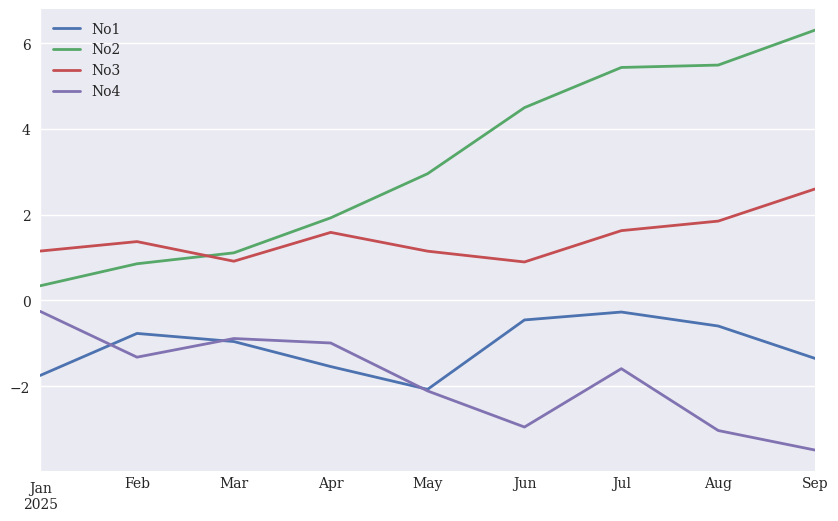

In [116]:
df.cumsum().plot(lw=2.0, figsize=(10, 6))

Plot Parameters
| Parameter | Format | Description |
|-----------|--------|-------------|
| x | label/position, default None | Only used when column values are x-ticks |
| y | label/position, default None | Only used when column values are y-ticks |
| subplots | boolean, default False | Plot columns in subplots |
| sharex | boolean, default True | Share the x-axis |
| sharey | boolean, default False | Share the y-axis |
| use_index | boolean, default True | Use DataFrame.index as x-ticks |
| stacked | boolean, default False | Stack (only for bar plots) |
| sort_columns | boolean, default False | Sort columns alphabetically before plotting |
| title | string, default None | Title for the plot |
| grid | boolean, default False | Show horizontal and vertical grid lines |
| legend | boolean, default True | Show legend of labels |
| ax | matplotlib axis object | matplotlib axis object to use for plotting |
| style | string or list/dictionary | Line plotting style (for each column) |
| kind | string (e.g., "line", "bar", "barh", "kde", "density") | Type of plot |
| logx | boolean, default False | Use logarithmic scaling of x-axis |
| logy | boolean, default False | Use logarithmic scaling of y-axis |
| xticks | sequence, default Index | X-ticks for the plot |
| yticks | sequence, default Values | Y-ticks for the plot |
| xlim | 2-tuple, list | Boundaries for x-axis |
| ylim | 2-tuple, list | Boundaries for y-axis |
| rot | integer, default None | Rotation of x-ticks |
| secondary_y | boolean/sequence, default False | Plot on secondary y-axis |
| mark_right | boolean, default True | Automatic labeling of secondary axis |
| colormap | string/colormap object, default None | Color map to use for plotting |
| kwds | keywords | Options to pass to matplotlib |



<Axes: >

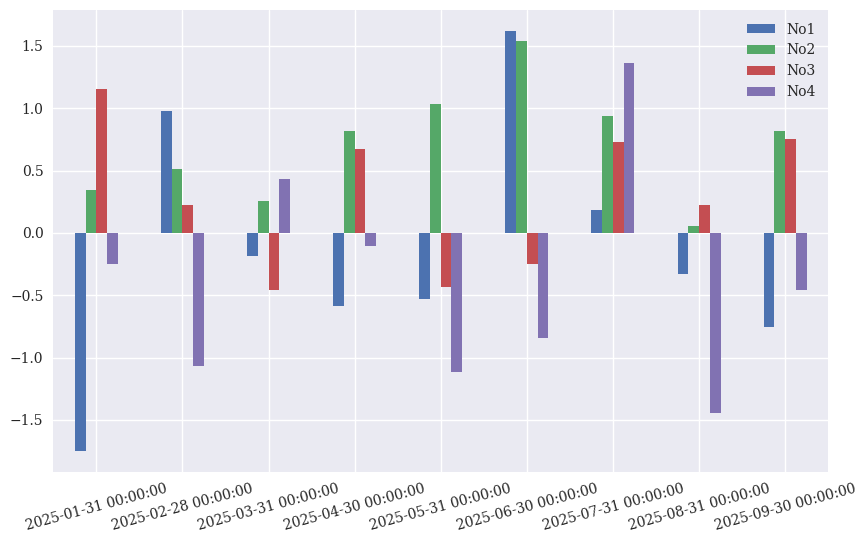

In [118]:
df.plot.bar(figsize=(10,6), rot=15)

# The Series Class

A Series object is obtained when a single column is selected from a multicolumn DataFrame object.

In [119]:
type(df)

pandas.core.frame.DataFrame

In [121]:
S = pd.Series(np.linspace(0, 15, 7), name='series')
S

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [122]:
type(S)

pandas.core.series.Series

In [125]:
s = df['No1']
print(s)
print(type(s))

2025-01-31   -1.749765
2025-02-28    0.981321
2025-03-31   -0.189496
2025-04-30   -0.583595
2025-05-31   -0.531280
2025-06-30    1.618982
2025-07-31    0.184519
2025-08-31   -0.326238
2025-09-30   -0.756352
Freq: ME, Name: No1, dtype: float64
<class 'pandas.core.series.Series'>


In [126]:
s.mean()

np.float64(-0.1502117730731945)

<Axes: >

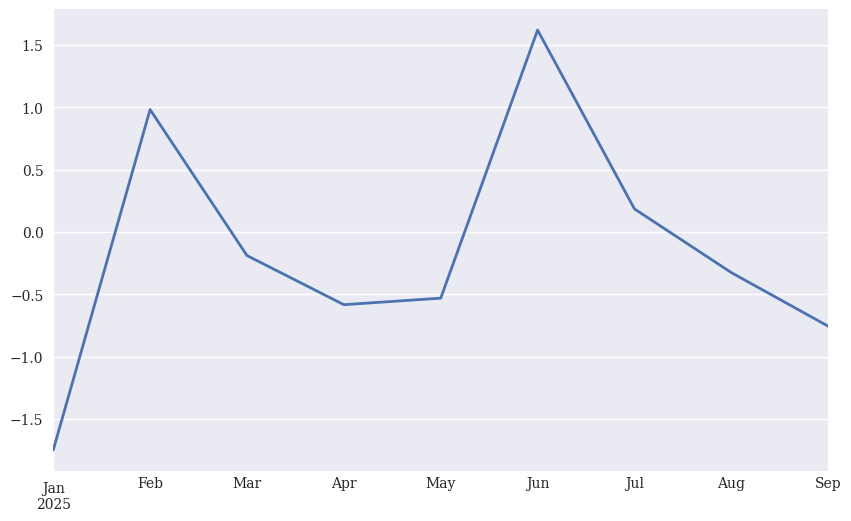

In [129]:
s.plot(lw=2.0, figsize=(10, 6))

# GroupBy Operations

In [132]:
df['Quarter'] = ['Q%d'%(i//3 + 1) for i in range(len(df))]
df

,No1,No2,No3,No4,Quarter
2025-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2025-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2025-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2025-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2025-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2025-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2025-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2025-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2025-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [135]:
groups = df.groupby('Quarter')

In [137]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [138]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [139]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


In [148]:
groups.aggregate("min max std mean size".split()).round(3)

No1                              No2                            \
           min    max    std   mean size    min    max    std   mean size   
Quarter                                                                     
Q1      -1.750  0.981  1.370 -0.319    3  0.255  0.514  0.132  0.371    3   
Q2      -0.584  1.619  1.257  0.168    3  0.817  1.542  0.373  1.129    3   
Q3      -0.756  0.185  0.471 -0.299    3  0.056  0.937  0.478  0.603    3   

           No3                              No4                            
           min    max    std   mean size    min    max    std   mean size  
Quarter                                                                    
Q1      -0.458  1.153  0.809  0.305    3 -1.070  0.435  0.754 -0.296    3  
Q2      -0.438  0.673  0.595 -0.006    3 -1.118 -0.104  0.524 -0.688    3  
Q3       0.222  0.750  0.299  0.568    3 -1.443  1.362  1.423 -0.179    3

In [154]:
df['odd_even'] = ['odd', 'even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd']
groups = df.groupby(['Quarter', 'odd_even'])
groups.size()

Quarter  odd_even
Q1       even        1
         odd         2
Q2       even        2
         odd         1
Q3       even        1
         odd         2
dtype: int64

In [158]:
groups[['No1', 'No4']].aggregate(["sum", "mean"])

No1                 No4          
                       sum      mean       sum      mean
Quarter odd_even                                        
Q1      even      0.981321  0.981321 -1.070043 -1.070043
        odd      -1.939261 -0.969631  0.182727  0.091364
Q2      even      1.035387  0.517693 -0.946847 -0.473423
        odd      -0.531280 -0.531280 -1.118318 -1.118318
Q3      even     -0.326238 -0.326238 -1.443217 -1.443217
        odd      -0.571834 -0.285917  0.905609  0.452805

# Complex Selection

Often, data selection is accomplished by formulation of conditions on column values,
and potentially combining multiple such conditions logically.

In [159]:
data = np.random.standard_normal((10, 2))
df = pd.DataFrame(data, columns=['x', 'y'])

In [161]:
df.head()

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


In [162]:
df.tail()

,x,y
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [163]:
df['x'] > 0.5

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [164]:
(df['x'] > 0) & (df['y'] < 0)

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [165]:
(df['x'] > 0) | (df['y'] < 0)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
dtype: bool

In [167]:
df[(df['x'] > 0) & (df['y'] < 0)]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [168]:
df.query('x > 0 & y < 0')

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [169]:
df[(df.x > 0) | (df.y < 0)]

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [171]:
df[df > 0]

,x,y
0,1.189622,NaN
1,NaN,NaN
2,NaN,NaN
3,0.007315,NaN
4,1.299748,NaN
5,NaN,0.357508
6,NaN,1.470714
7,NaN,NaN
8,NaN,NaN
9,0.108863,0.507810


# Concatenation, Joining, and Merging

In [179]:
df1 = pd.DataFrame([100*i for i in range(1, 5)], index=list('abcd'), columns=['A'])
df1

,A
a,100
b,200
c,300
d,400


In [180]:
df2 = pd.DataFrame([200, 150, 50], index=['f', 'b', 'd'], columns=['B',])
df2

,B
f,200
b,150
d,50


## Concatenation

Concatenation or appending basically means that rows are added from one DataFrame
object to another one. This can be accomplished via the pd.concat() function. A major consideration is how the index values are handled.

In [186]:
pd.concat((df1, df2), sort=False)

,A,B
a,100.0,NaN
b,200.0,NaN
c,300.0,NaN
d,400.0,NaN
f,NaN,200.0
b,NaN,150.0
d,NaN,50.0


## Joining

When joining the two data sets, the sequence of the DataFrame objects also matters
but in a different way. Only the index values from the first DataFrame object are used.
This default behavior is called a left join.

In [187]:
df1.join(df2)

,A,B
a,100,NaN
b,200,150.0
c,300,NaN
d,400,50.0


In [188]:
df2.join(df1)

,B,A
f,200,NaN
b,150,200.0
d,50,400.0


There are a total of four different join methods available, each leading to a different
behavior with regard to how index values and the corresponding data rows are
handled.

In [189]:
df1.join(df2, how='left')

,A,B
a,100,NaN
b,200,150.0
c,300,NaN
d,400,50.0


In [190]:
df1.join(df2, how='right')

,A,B
f,NaN,200
b,200.0,150
d,400.0,50


In [191]:
df1.join(df2, how='inner')

,A,B
b,200,150
d,400,50


In [192]:
df1.join(df2, how='outer')

,A,B
a,100.0,NaN
b,200.0,150.0
c,300.0,NaN
d,400.0,50.0
f,NaN,200.0


A join can also happen based on an empty DataFrame object. In this case, the columns are created sequentially, leading to behavior similar to a left joi.

In [193]:
df = pd.DataFrame()
df['A'] = df1['A']
df['B'] = df2['B']
df

,A,B
a,100,NaN
b,200,150.0
c,300,NaN
d,400,50.0


Making use of a dictionary to combine the data sets yields a result similar to an outer
join since the columns are created simultaneously.

In [194]:
df = pd.DataFrame({'A':df1['A'], 'B':df2['B']})
df

,A,B
a,100.0,NaN
b,200.0,150.0
c,300.0,NaN
d,400.0,50.0
f,NaN,200.0


## Merging

While a join operation takes place based on the indices of the DataFrame objects to be
joined, a merge operation typically takes place on a column shared between the two
data sets. To this end, a new column C is added to both original DataFrame objects.

In [195]:
c = pd.Series([250, 150, 50], index=['b','d','c'])
df1['C'] = c
df2['C'] = c

By default, the merge operation in this case takes place based on the single shared
column C. Other options are available, however, such as an outer merge.

In [199]:
df1

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [200]:
df2

,B,C
f,200,NaN
b,150,250.0
d,50,150.0


In [198]:
pd.merge(df1, df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [203]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [205]:
pd.merge(df1, df2, how='outer') #An outer merge is also possible, preserving all data rows.

,A,C,B
0,300,50.0,NaN
1,400,150.0,50.0
2,200,250.0,150.0
3,100,NaN,200.0


In [207]:
# Merge df1 and df2 by matching values in column A of df1 with values in column B of df2
pd.merge(df1, df2, left_on='A', right_on='B')

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [208]:
pd.merge(df1, df2, left_on='A', right_on='B', how='outer')

,A,C_x,B,C_y
0,NaN,NaN,50.0,150.0
1,100.0,NaN,NaN,NaN
2,NaN,NaN,150.0,250.0
3,200.0,250.0,200.0,NaN
4,300.0,50.0,NaN,NaN
5,400.0,150.0,NaN,NaN


In [213]:
# Merge df1 and df2 using their index values to match rows, rather than matching on column values
pd.merge(df1, df2, left_index=True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


# Performance Aspects

Many examples in this chapter illustrate that there are often multiple options to achieve the same goal with pandas. This section compares such options for adding up
two columns element-wise. First, the data set, generated with NumPy.

In [214]:
data = np.random.standard_normal((1000000, 2))
data.nbytes

16000000

In [215]:
df = pd.DataFrame(data, columns=['x', 'y'])

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1000000 non-null  float64
 1   y       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [219]:
%time res = df['x'] + df['y']
res[:3]

CPU times: user 3.62 ms, sys: 8.31 ms, total: 11.9 ms
Wall time: 11.7 ms


0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [220]:
%time res = df.sum(axis=1)

CPU times: user 89.4 ms, sys: 21.1 ms, total: 111 ms
Wall time: 128 ms


In [223]:
%time res = df.values.sum(axis=1)

CPU times: user 10.2 ms, sys: 7.17 ms, total: 17.3 ms
Wall time: 19.6 ms


In [225]:
res[:3]

array([ 0.3872424 , -0.96934273, -0.86315944])

In [226]:
%time res = df.eval('x + y')

CPU times: user 5.71 ms, sys: 15 ms, total: 20.7 ms
Wall time: 31.2 ms


In [227]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [228]:
%time res = df.apply(lambda row : row['x'] + row['y'], axis=1)

CPU times: user 4.15 s, sys: 81.3 ms, total: 4.23 s
Wall time: 4.33 s


eval() is a method dedicated to evaluation of (complex) numerical expressions;
columns can be directly addressed. The slowest option is to use the apply() method row-by-row; this is like looping on the Python level over all rows.